In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('Boats_Cleaned_dataset.csv')




In [2]:
df = df.drop_duplicates()
df = df.dropna()
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1


lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR



In [3]:
df = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]



print(df) 

       Unnamed: 0       id   type          boatClass         make  \
2               5  7271336  power         power-deck     Bayliner   
4               8  6824832  power          power-aft       Carver   
9              14  6920067  power  power-convertible     Hatteras   
10             15  7034740  power  power-convertible     Hatteras   
18             26  7183782  power    power-sportfish        Ocean   
...           ...      ...    ...                ...          ...   
18880       19978  6665591  power     power-saltfish      Release   
18885       19983  6966190  power     power-bowrider       Robalo   
18890       19988  7047311  power          power-bay    Tidewater   
18896       19994  6982322  power       power-center  Boca Grande   
18902       20000  7140924  power      power-cruiser     Bayliner   

                                model  year condition  length_ft  beam_ft  \
2                         Element 180  2020       new      18.00     7.42   
4           440 A

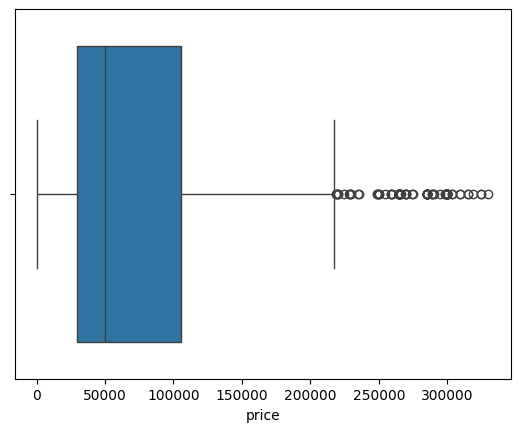

In [4]:
sns.boxplot(data=df, x='price')
plt.show()

In [5]:

pd_description = df.describe()
pd_description

,Unnamed: 0,id,year,length_ft,beam_ft,dryWeight_lb,numEngines,totalHP,maxEngineYear,minEngineYear,price,sellerId,created_month,created_year
count,968.000000,9.680000e+02,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,15114.457645,6.814773e+06,2009.990702,26.862986,9.463213,8187.102025,1.368802,330.946074,2010.949380,2010.904959,83847.411415,48461.215909,5.684917,2018.274793
std,3992.803952,4.692165e+05,11.272819,8.638433,3.139155,10558.644689,0.499574,313.145518,10.388947,10.394258,81583.292388,52284.099565,3.384205,1.103208
min,5.000000,3.753445e+06,1955.000000,10.000000,3.490000,80.000000,1.000000,0.000000,1955.000000,1955.000000,618.000000,1024.000000,1.000000,2011.000000
25%,13381.750000,6.818604e+06,2003.000000,20.500000,8.170000,2300.000000,1.000000,115.000000,2005.000000,2005.000000,29500.000000,17929.000000,3.000000,2018.000000
50%,15925.500000,6.951378e+06,2015.000000,24.500000,8.500000,4100.000000,1.000000,250.000000,2016.000000,2016.000000,49995.000000,34692.000000,6.000000,2019.000000
75%,17972.750000,7.034994e+06,2019.000000,33.000000,10.000000,10905.000000,2.000000,540.000000,2019.000000,2019.000000,105197.500000,56482.000000,8.000000,2019.000000
max,20000.000000,7.271336e+06,2020.000000,67.000000,75.420000,92000.000000,4.000000,2160.000000,2020.000000,2020.000000,329995.000000,262657.000000,12.000000,2019.000000


In [6]:
pd_description = df.describe()
MeanPrice = pd_description ['price']['mean']
medianprice = pd_description ['price']['mean']
stdprice = pd_description ['price']['std']
maxprice = pd_description ['price']['max']
minprice = pd_description ['price']['min']
print(f"Mean Price: {MeanPrice:.3f}")
print(f"Median Price: {stdprice:.3f}")
print(f"Standard deviation for Price: {stdprice:.3f}")
print(f"Max Price: {maxprice:.3f}")
print(f"Min Price: {minprice:.3f}")

Mean Price: 83847.411
Median Price: 81583.292
Standard deviation for Price: 81583.292
Max Price: 329995.000
Min Price: 618.000


In [7]:
#why not
mean_horsepower = pd_description['totalHP'].mean()
median_horsepower = pd_description['totalHP'].median()
max_horsepower = pd_description['totalHP'].max()
min_horsepower = pd_description['totalHP'].min()
std_horsepower = pd_description['totalHP'].std()
print(f"Median Price: {median_horsepower:.3f}")
print(f"Mean Price: {mean_horsepower:.3f}")
print(f"Max Price: {max_horsepower:.3f}")
print(f"Min Price: {min_horsepower:.3f}")
print(f"STD Price: {std_horsepower:.3f}")

Median Price: 322.046
Mean Price: 584.636
Max Price: 2160.000
Min Price: 0.000
STD Price: 701.339


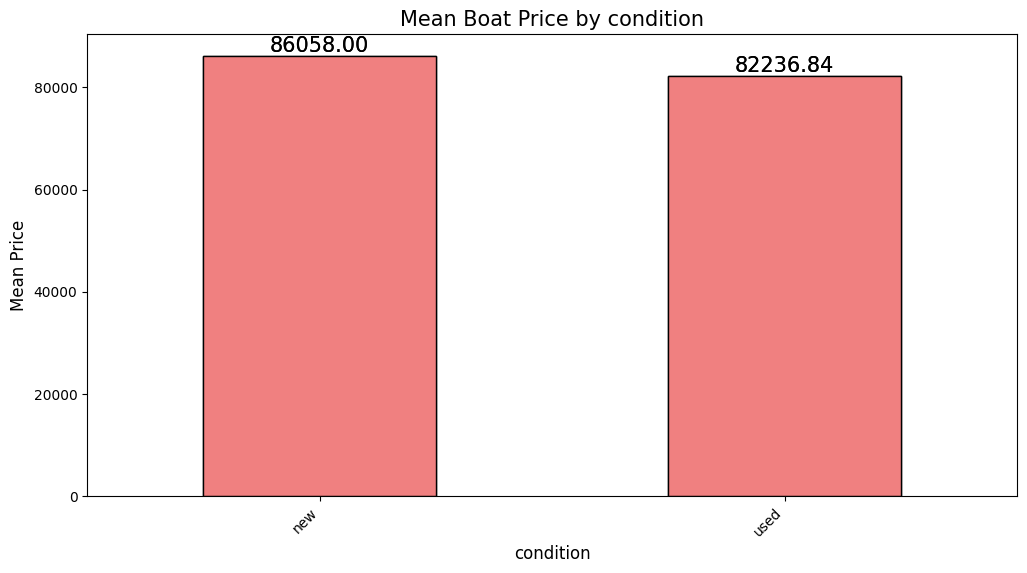

In [8]:
condition_mean_prices = df.groupby('condition')['price'].mean()

# Plot the bar graph
plt.figure(figsize=(12, 6))
condition_mean_prices.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('condition', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)
plt.title('Mean Boat Price by condition', fontsize=15)

bars = condition_mean_prices.plot(kind='bar', color='lightcoral', edgecolor='black')

for bar in bars.patches:
    y_value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_value, f'{y_value:.2f}', 
             ha='center', va='bottom', fontsize=15)  # Adjust position

    
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

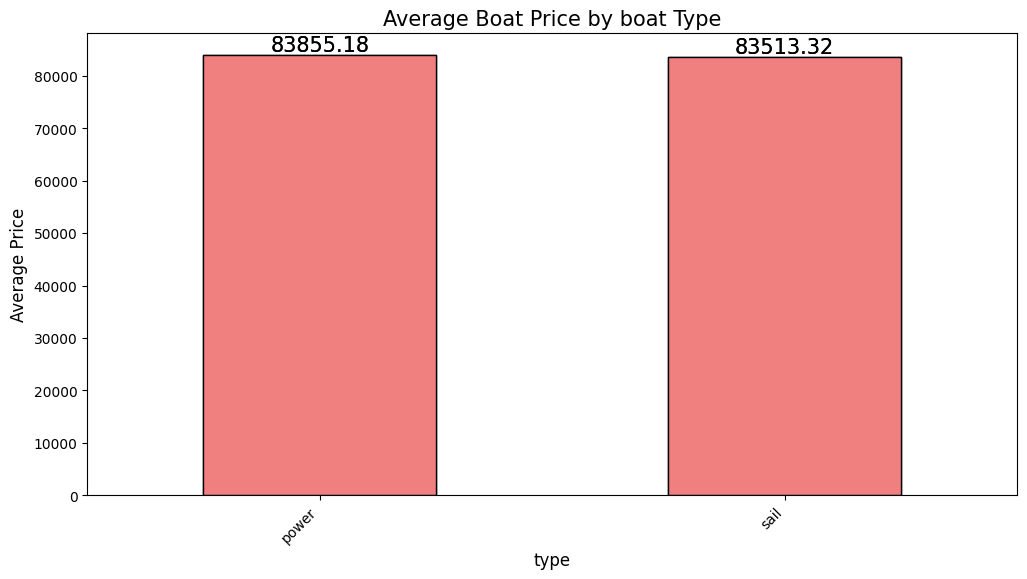

In [9]:

type_mean_prices = df.groupby('type')['price'].mean()

# Plot the bar graph
plt.figure(figsize=(12, 6))
type_mean_prices.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('fuelType', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average Boat Price by boat Type', fontsize=15)

bars = type_mean_prices.plot(kind='bar', color='lightcoral', edgecolor='black')

for bar in bars.patches:
    y_value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_value, f'{y_value:.2f}', 
             ha='center', va='bottom', fontsize=15)  # Adjust position

    
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

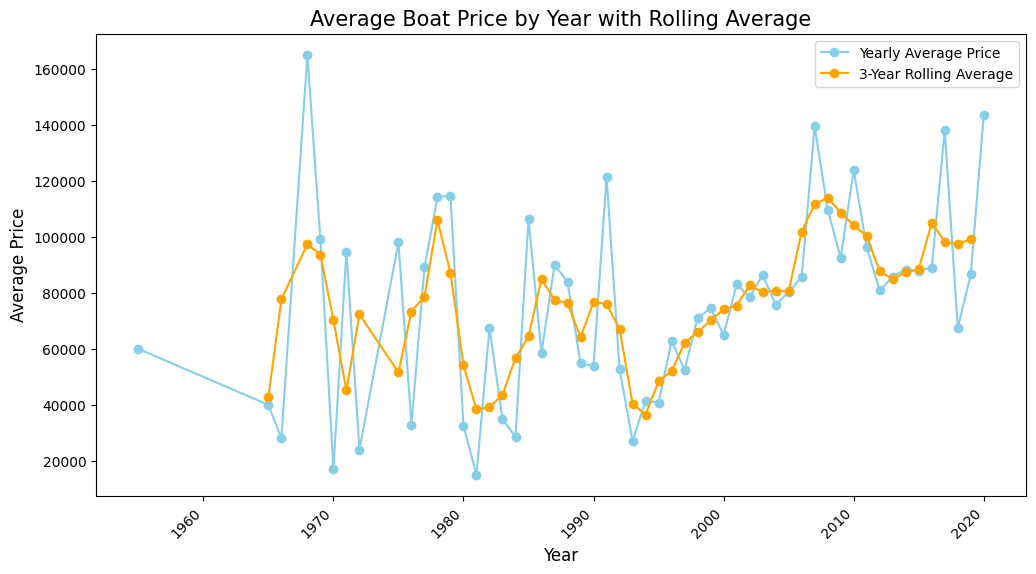

In [96]:
year_mean_prices = df.groupby('year')['price'].mean()
rolling_mean = year_mean_prices.rolling(window=3, center=True).mean()

# Plot the original and rolling average prices
plt.figure(figsize=(12, 6))
plt.plot(year_mean_prices, marker='o', linestyle='-', label='Yearly Average Price', color='skyblue')
plt.plot(rolling_mean, marker='o', linestyle='-', label='3-Year Rolling Average', color='orange')

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average Boat Price by Year with Rolling Average', fontsize=15)
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

AttributeError: Figure.set() got an unexpected keyword argument 'nrow'